In [49]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from utils import *

In [78]:
!cd

C:\Users\p2p2l\projects\wgong\zistory\zinets\app\zadmin


In [42]:
with DBConn() as _conn:
    sql_1 = f"""
        select simi_raw,count(*) as freq
        from t_zi_part_pinyin
        where is_active='Y' and simi_raw > '0.000'
        group by simi_raw
        order by simi_raw
    """
    
    df_1 = pd.read_sql(sql_1, _conn).fillna("")
    
    sql_2 = f"""
        select simi_refined,count(*) as freq
        from t_zi_part_pinyin
        where is_active='Y' and simi_refined > '0.000'
        group by simi_refined
        order by simi_refined
    """
    
    df_2 = pd.read_sql(sql_2, _conn).fillna("")

In [43]:
df_1

,simi_raw,freq
0,0.167,18
1,0.200,217
2,0.250,1325
3,0.333,1587
4,0.400,127
5,0.500,1201
6,0.600,103
7,0.667,647
8,0.750,339
9,0.800,40


In [60]:
dict_raw = df_1.to_dict("records")

In [44]:
df_2

,simi_refined,freq
0,0.250,209
1,0.333,1649
2,0.500,1256
3,0.667,551
4,0.750,83
5,1.000,4828


In [61]:
dict_refined = df_2.to_dict("records")

In [63]:
dict_raw

[{'simi_raw': '0.167', 'freq': 18},
 {'simi_raw': '0.200', 'freq': 217},
 {'simi_raw': '0.250', 'freq': 1325},
 {'simi_raw': '0.333', 'freq': 1587},
 {'simi_raw': '0.400', 'freq': 127},
 {'simi_raw': '0.500', 'freq': 1201},
 {'simi_raw': '0.600', 'freq': 103},
 {'simi_raw': '0.667', 'freq': 647},
 {'simi_raw': '0.750', 'freq': 339},
 {'simi_raw': '0.800', 'freq': 40},
 {'simi_raw': '1.000', 'freq': 3465}]

In [62]:
dict_refined

[{'simi_refined': '0.250', 'freq': 209},
 {'simi_refined': '0.333', 'freq': 1649},
 {'simi_refined': '0.500', 'freq': 1256},
 {'simi_refined': '0.667', 'freq': 551},
 {'simi_refined': '0.750', 'freq': 83},
 {'simi_refined': '1.000', 'freq': 4828}]

In [67]:
def cal_simi_ratio(data, kind="raw", simi_cutoff=0.67):
    """
    calculate ratio of phonetic matches
    Input: 
        dictionary of simi score vs freq
    Return:
        ratio number
    """
    key_name_map = {"raw": "simi_raw", "refined": "simi_refined"}
    numerator = denominator = 0
    known_kinds = list(key_name_map.keys())
    if kind not in known_kinds:
        raise Exception(f"{kind} not in known kinds: {known_kinds}")

    k_name = key_name_map.get(kind)
    v_name = "freq"
    for d in data:
        k,v = d.get(k_name), d.get(v_name)
        denominator += v
        if float(k) >= simi_cutoff:
            numerator += v

    if denominator == 0:
        raise Exception(f"Data issue: {d}")

    return 100*numerator / float(denominator), (numerator, denominator)

### simi_cutoff = 0.60 / 0.90

In [77]:
data_map = {"raw": dict_raw, "refined": dict_refined}

for kind in ("raw", "refined"):
    print(f"\nkind: {kind}")
    for simi_cutoff in (0.60, 0.90):
        print(f"\tsimi_cutoff: {simi_cutoff}")
        data = data_map.get(kind)
        x = cal_simi_ratio(data, kind=kind, simi_cutoff=simi_cutoff)
        print(f"\t\tSimi score ratio:", x) 


kind: raw
	simi_cutoff: 0.6
		Simi score ratio: (50.65608115558496, (4594, 9069))
	simi_cutoff: 0.9
		Simi score ratio: (38.20707906053589, (3465, 9069))

kind: refined
	simi_cutoff: 0.6
		Simi score ratio: (63.68936567164179, (5462, 8576))
	simi_cutoff: 0.9
		Simi score ratio: (56.29664179104478, (4828, 8576))


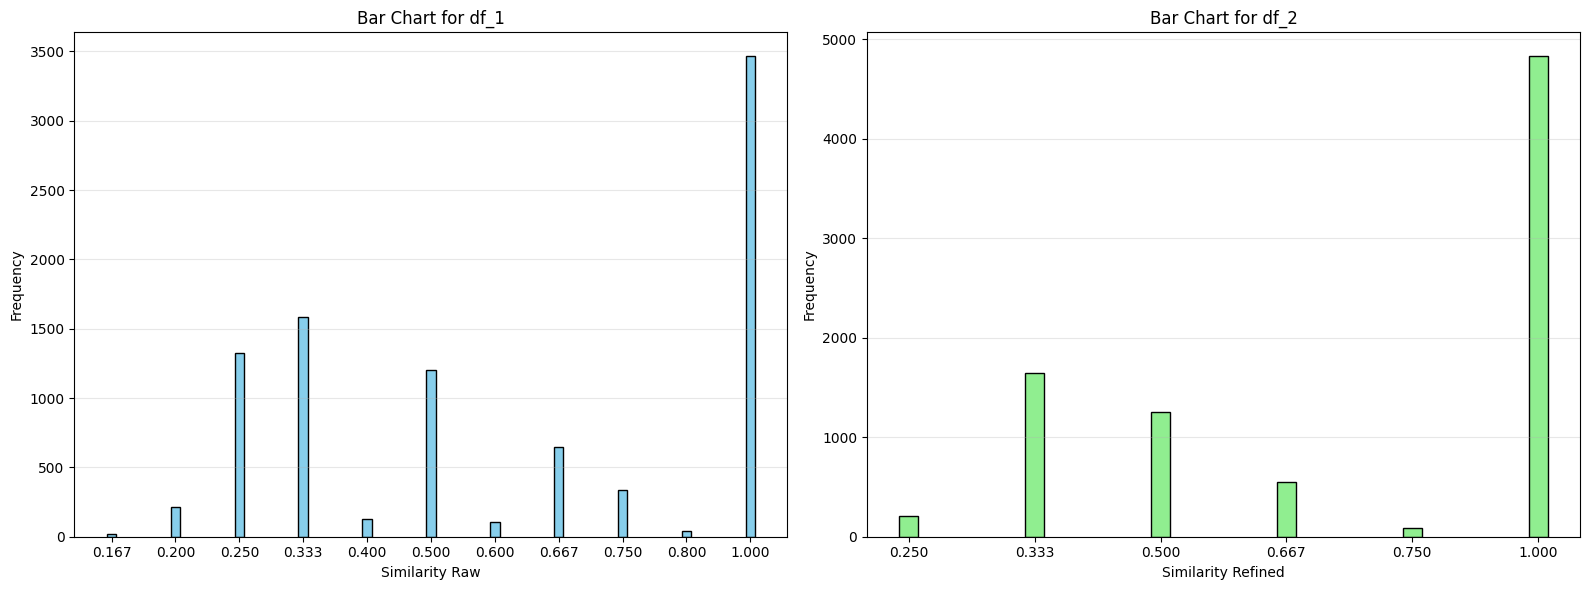

In [50]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot for df_1
ax1.bar(df_1['simi_raw'], df_1['freq'], width=0.15, color='skyblue', edgecolor='black')
ax1.set_xlabel('Similarity Raw')
ax1.set_ylabel('Frequency')
ax1.set_title('Bar Chart for df_1')
ax1.grid(axis='y', alpha=0.3)
# ax1.axvline(x=0.4, color='red', linestyle='--', linewidth=2, label='x=0.4')
# ax1.legend()

# Plot for df_2
ax2.bar(df_2['simi_refined'], df_2['freq'], width=0.15, color='lightgreen', edgecolor='black')
ax2.set_xlabel('Similarity Refined')
ax2.set_ylabel('Frequency')
ax2.set_title('Bar Chart for df_2')
ax2.grid(axis='y', alpha=0.3)
# ax2.axvline(x=0.4, color='red', linestyle='--', linewidth=2, label='x=0.4')
# ax2.legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [52]:
with DBConn() as _conn:
    sql_3 = f"""
SELECT position, AVG(simi_refined) AS avg_similarity
FROM t_zi_part_pinyin
WHERE is_active = 'Y'
GROUP BY position
order by position
    """
    
    df_3 = pd.read_sql(sql_3, _conn).fillna("")

In [53]:
df_3

,position,avg_similarity
0,zi_down,0.360412
1,zi_left,0.269041
2,zi_left_down,0.247654
3,zi_left_up,0.263632
4,zi_mid,0.780409
5,zi_mid_in,0.379504
6,zi_mid_out,0.298323
7,zi_right,0.500073
8,zi_right_down,0.315927
9,zi_right_up,0.281145


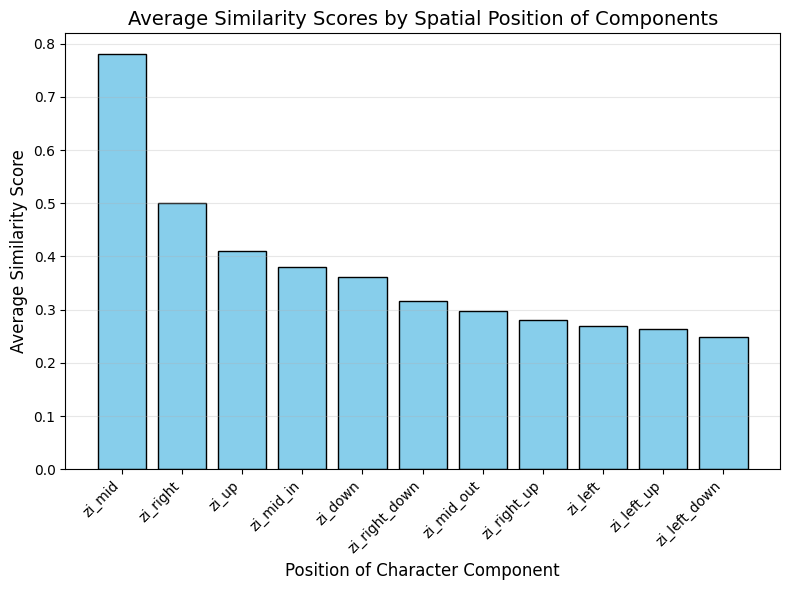

In [54]:
# Ensure the DataFrame is sorted by avg_similarity if needed
df_3_sorted = df_3.sort_values(by='avg_similarity', ascending=False)

# Create the bar chart
plt.figure(figsize=(8, 6))  # Set the figure size
plt.bar(
    df_3_sorted['position'],  # x-axis: positions
    df_3_sorted['avg_similarity'],  # y-axis: average similarity
    color='skyblue',  # Bar color
    edgecolor='black'  # Edge color for bars
)

# Add labels and title
plt.xlabel('Position of Character Component', fontsize=12)
plt.ylabel('Average Similarity Score', fontsize=12)
plt.title('Average Similarity Scores by Spatial Position of Components', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid lines for better visualization
plt.grid(axis='y', alpha=0.3)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [55]:
with DBConn() as _conn:
    sql_4 = f"""
SELECT position, AVG(simi_raw) AS avg_similarity
FROM t_zi_part_pinyin
WHERE is_active = 'Y'
GROUP BY position
order by position
    """
    
    df_4 = pd.read_sql(sql_4, _conn).fillna("")

In [56]:
df_4

,position,avg_similarity
0,zi_down,0.292767
1,zi_left,0.226873
2,zi_left_down,0.214562
3,zi_left_up,0.212944
4,zi_mid,0.728743
5,zi_mid_in,0.347650
6,zi_mid_out,0.259581
7,zi_right,0.431624
8,zi_right_down,0.232052
9,zi_right_up,0.201870


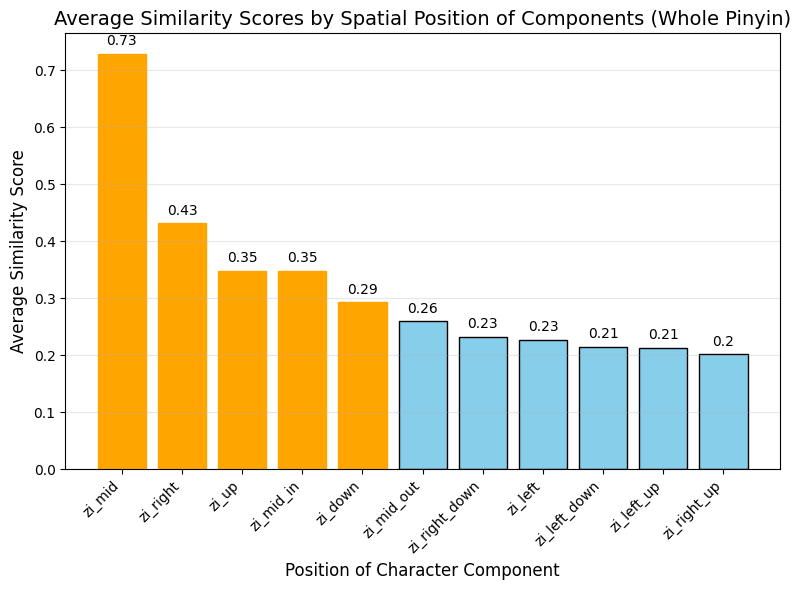

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_4 is already sorted by avg_similarity in descending order
df_4_sorted = df_4.sort_values(by='avg_similarity', ascending=False)

# Create the bar chart
plt.figure(figsize=(8, 6))  # Set the figure size
bars = plt.bar(
    df_4_sorted['position'],  # x-axis: positions
    df_4_sorted['avg_similarity'],  # y-axis: average similarity
    color='skyblue',  # Bar color
    edgecolor='black'  # Edge color for bars
)

# Add numerical labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Position of Character Component', fontsize=12)
plt.ylabel('Average Similarity Score', fontsize=12)
plt.title('Average Similarity Scores by Spatial Position of Components (Whole Pinyin)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid lines for better visualization
plt.grid(axis='y', alpha=0.3)

# Highlight top 5 positions (optional)
top_5_positions = df_4_sorted['position'].head(5).tolist()
for i, bar in enumerate(bars):
    if df_4_sorted.iloc[i]['position'] in top_5_positions:
        bar.set_color('orange')  # Highlight top 5 positions in orange

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()